<a href="https://colab.research.google.com/github/Rishit003/BDCE-ML-Task-1/blob/main/BDCE_ML_Task_1_Rishit_Singh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Task - 1**
---
## **By Rishit Singh - 2313103**
---

## **1. Importing the data set**

Importing the pandas, numpy, seaborn and matplotlib packages

In [4]:
import pandas
import numpy
import seaborn
import matplotlib

Importing the csv file as data

In [5]:
data = pandas.read_csv("user_behavior_dataset_task1.csv")

---

## **2. Initial impressions of the given data set**

##### **Viewing some data to get a gist of the given dataframe**

In [30]:
print(data.head())
print(data.tail())

   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                     393.0   
1        2       OnePlus 9          Android                     268.0   
2        3    Xiaomi Mi 11          Android                     154.0   
3        4  Google Pixel 5          Android                     239.0   
4        5       iPhone 12              iOS                     187.0   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                   1872.0   
1                         4.7                   1331.0   
2                         4.0                    761.0   
3                         4.8                   1676.0   
4                         4.3                   1367.0   

   Number of Apps Installed  Data Usage (MB/day)   Age  Gender  \
0                      67.0               1122.0  40.0    Male   
1                      42.0                944.0  47.0  Female   
2             

##### **Describing the data using the describe command**

In [29]:
print(data.describe())

          User ID  App Usage Time (min/day)  Screen On Time (hours/day)  \
count  640.000000                640.000000                  640.000000   
mean   342.554688                273.921875                    5.336719   
std    204.160260                177.725792                    3.060799   
min      1.000000                 30.000000                    1.000000   
25%    172.750000                119.000000                    2.675000   
50%    341.500000                228.500000                    5.000000   
75%    511.250000                441.250000                    7.400000   
max    699.000000                598.000000                   12.000000   

       Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
count               640.000000                640.000000           640.000000   
mean               1541.690625                 51.110937           943.243750   
std                 813.010943                 26.840663           644.935631   


##### **Pandas command to print out the number of unique values for different data variables.**

In [7]:
data.nunique()

,0
User ID,671
Device Model,5
Operating System,2
App Usage Time (min/day),380
Screen On Time (hours/day),107
Battery Drain (mAh/day),596
Number of Apps Installed,86
Data Usage (MB/day),560
Age,42
Gender,2


##### **Conclusion** - We can conclude from above that our data set contains behaviour of smartphone users accross 5 different smartphone models. Each user is assigned a behaviour class from 1-5 depending upon some behaviour pattern.

## **3. Cleaning the data set**

##### **Removing null values**

Checking for null values

In [8]:
data.isnull().sum()

,0
User ID,0
Device Model,2
Operating System,0
App Usage Time (min/day),8
Screen On Time (hours/day),11
Battery Drain (mAh/day),12
Number of Apps Installed,13
Data Usage (MB/day),7
Age,10
Gender,0


Checking how many user entries are containg null values.

In [9]:
clean_data = data.dropna(axis = 0)

In [10]:
clean_data.nunique()

,0
User ID,615
Device Model,5
Operating System,2
App Usage Time (min/day),361
Screen On Time (hours/day),107
Battery Drain (mAh/day),563
Number of Apps Installed,86
Data Usage (MB/day),525
Age,42
Gender,2


We can see that there are 56 user entries which has  null values. Since the number is pretty low, it will not effect our analysis when dropped.

In [11]:
data=clean_data

## **4. Visualising the data set**

#### **1. Correlational Matrix**

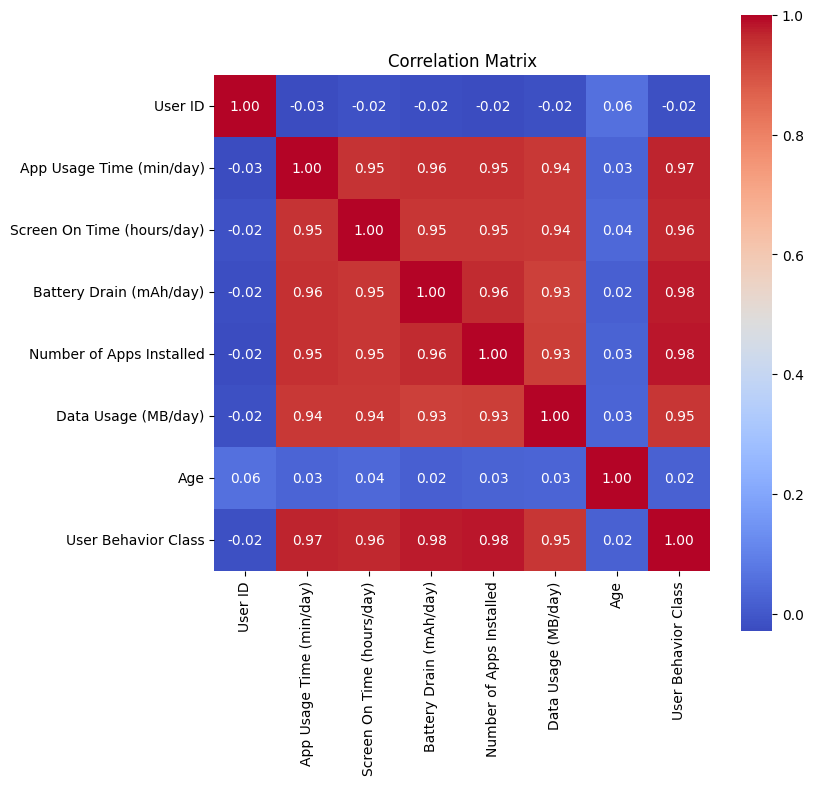

In [34]:
correlation=data.corr(numeric_only=True)
matplotlib.pyplot.figure(figsize=(8, 8))
seaborn.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, xticklabels=correlation.columns, yticklabels=correlation.columns)
matplotlib.pyplot.title('Correlation Matrix')
matplotlib.pyplot.show()

#### **2. Demographic distribution accross the 5 Device Models**

##### **Distribution shown by a Pie Chart**

<Axes: ylabel='count'>

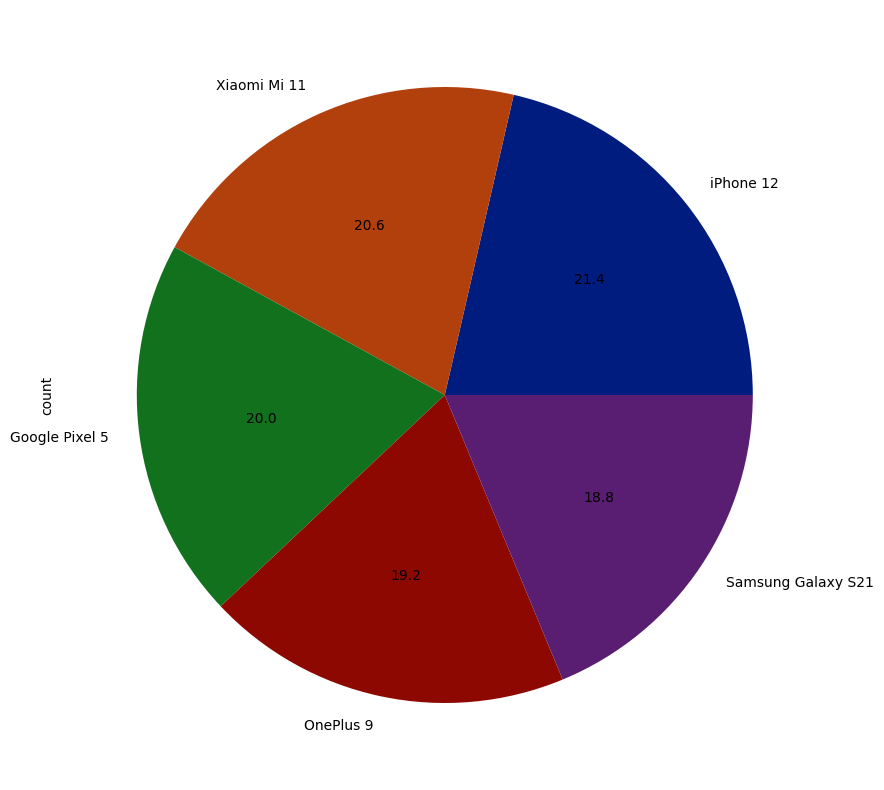

In [28]:
data['Device Model'].value_counts().plot.pie(y=data['Device Model'],figsize=(10,10),autopct='%1.1f',colors=seaborn.color_palette('dark'))

**Conclusion** - The given data set contains almost equally distributed number of users in each device, with iPhone 12 having the largest and Samsung Galaxy S21 having the smallest demographic.

##### **Distribution according to Gender shown by a Bar Graph**

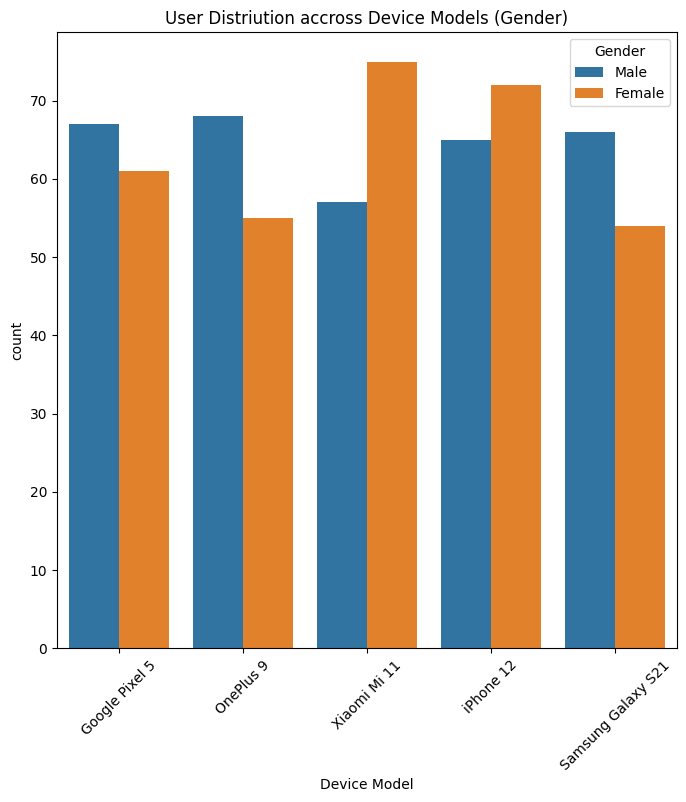

In [35]:
matplotlib.pyplot.figure(figsize=(8, 8))
seaborn.countplot(x='Device Model', data=data, hue='Gender')
matplotlib.pyplot.title('User Distriution accross Device Models (Gender)')
matplotlib.pyplot.xticks(rotation=45)
matplotlib.pyplot.show()

**Conclusion** - The given data set contains almost equally distributed number of users in each device, with Xiaomi Mi 11 and iPhone 12 having a slightly larger demographic in females.

##### **Distribution according to Age shown by a Bar Graph**

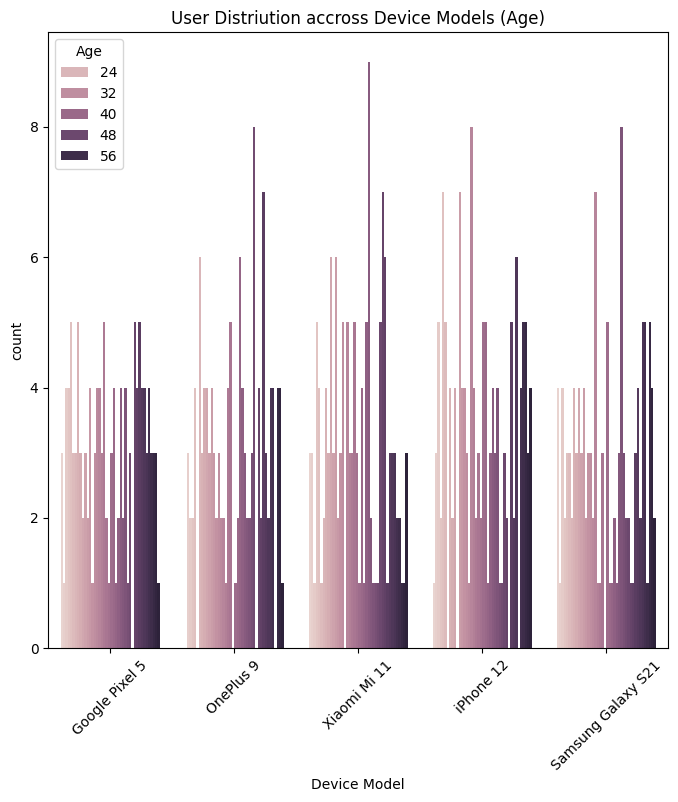

In [36]:
matplotlib.pyplot.figure(figsize=(8, 8))
seaborn.countplot(x='Device Model', data=data, hue='Age')
matplotlib.pyplot.title('User Distriution accross Device Models (Age)')
matplotlib.pyplot.xticks(rotation=45)
matplotlib.pyplot.show()

**Conclusions -**<br>

**1. Google Pixel 5** - has a equally distributed demographic<br>
**2. One Plus 9** - more popular in the middle aged group ranging from 40-48<br>
**3. Xiaomi Mi 11** - most popular in middle aged groups<br>
**4. iPhone 12** - most popular in the younger as well as older age group<br>
**5. Samsung Galaxy S21** - with a slight larger middle aged group


#### **3. Age vs Screen Time**

## **5. Summary of Findings: -**

####1.   **Age** <br>

####2.   **Screen Time** <br>